# Madi Joyal

## Research question/interests

Research Question: is there a connection between parental education status and alcohol consumption?
    Is this more for mothers or fathers?
    Does it influence you less if you don't live with one of your parents?




In [83]:
# My Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [84]:
#Task 1
##Taking a broad look at all of my data

df = pd.read_csv('../data/raw/student-merged.csv')
df.info()
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 54 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    382 non-null    int64 
 1   school        382 non-null    object
 2   sex           382 non-null    object
 3   age           382 non-null    int64 
 4   address       382 non-null    object
 5   famsize       382 non-null    object
 6   Pstatus       382 non-null    object
 7   Medu          382 non-null    int64 
 8   Fedu          382 non-null    int64 
 9   Mjob          382 non-null    object
 10  Fjob          382 non-null    object
 11  reason        382 non-null    object
 12  nursery       382 non-null    object
 13  internet      382 non-null    object
 14  guardian.x    382 non-null    object
 15  traveltime.x  382 non-null    int64 
 16  studytime.x   382 non-null    int64 
 17  failures.x    382 non-null    int64 
 18  schoolsup.x   382 non-null    object
 19  famsup.x

(382, 54)

In [85]:
df.describe()

,Unnamed: 0,age,Medu,Fedu,traveltime.x,studytime.x,failures.x,famrel.x,freetime.x,goout.x,...,famrel.y,freetime.y,goout.y,Dalc.y,Walc.y,health.y,absences.y,G1.y,G2.y,G3.y
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,...,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,191.500000,16.586387,2.806283,2.565445,1.442408,2.034031,0.290576,3.939791,3.222513,3.112565,...,3.942408,3.230366,3.117801,1.476440,2.290576,3.575916,3.672775,12.112565,12.238220,12.515707
std,110.418145,1.173470,1.086381,1.096240,0.695378,0.845798,0.729481,0.921620,0.988233,1.131927,...,0.908884,0.985096,1.133710,0.886303,1.282577,1.404248,4.905965,2.556531,2.468341,2.945438
min,1.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000
25%,96.250000,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,10.000000,11.000000,11.000000
50%,191.500000,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,12.000000,12.000000,13.000000
75%,286.750000,17.000000,4.000000,4.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,14.000000,14.000000,14.000000
max,382.000000,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


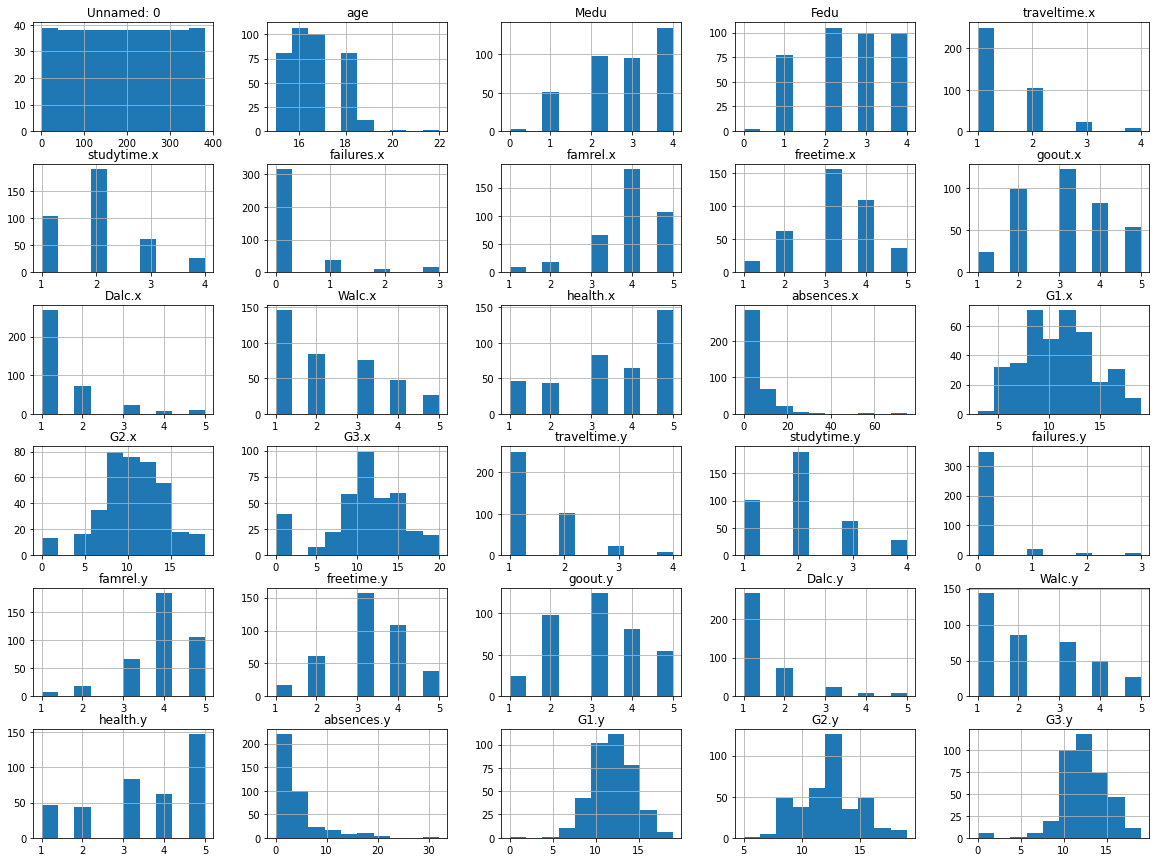

In [86]:
#Looking at histograms of all the columns with integers within my dataset.
#These visual representations helped me understand my data and helped me find outliers later in the EDA process.
hist = df.hist(bins=10,figsize =(20,15))

In [87]:
#Cleaning my Dataset

##Removing Outliers
df_cleaned = df.copy()
df_cleaned = df_cleaned[df_cleaned['age'].between(15, 19)]
df_cleaned = df_cleaned[df_cleaned['absences.x'] < 20]
df_cleaned = df_cleaned[df_cleaned['studytime.x'] < 60]
df_cleaned = df_cleaned[df_cleaned['absences.y'] < 20]
df_cleaned = df_cleaned[df_cleaned['studytime.y'] < 60]
df_cleaned.shape
df_cleaned

#Prior to cleaning, my dataset had 382 rows and 54 columns. Now it has 362 rows and 54 columns. 

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel.y,freetime.y,goout.y,Dalc.y,Walc.y,health.y,absences.y,G1.y,G2.y,G3.y
0,1,GP,F,15,R,GT3,T,1,1,at_home,...,3,1,2,1,1,1,4,13,13,13
1,2,GP,F,15,R,GT3,T,1,1,other,...,3,3,4,2,4,5,2,13,11,11
2,3,GP,F,15,R,GT3,T,2,2,at_home,...,4,3,1,1,1,2,8,14,13,12
3,4,GP,F,15,R,GT3,T,2,4,services,...,4,3,2,1,1,5,2,10,11,10
4,5,GP,F,15,R,GT3,T,3,3,services,...,4,2,1,2,3,3,2,13,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,378,MS,M,18,U,LE3,T,1,3,at_home,...,4,3,3,2,3,3,0,9,10,9
378,379,MS,M,18,U,LE3,T,4,4,teacher,...,4,2,2,2,2,5,0,15,16,16
379,380,MS,M,19,R,GT3,T,1,1,other,...,4,4,4,3,3,5,4,8,9,10
380,381,MS,M,19,R,GT3,T,1,1,other,...,5,4,4,3,3,2,8,10,9,11


In [122]:
##Checking my dataset for null values

df_cleaned = df_cleaned.dropna(axis=0)
df_cleaned.shape
#Since the row and column numbers stayed the same, we know that there are no null values in this dataset.

(362, 55)

In [124]:
#Creating a column of Medu (maternal education) and Fedu (paternal education) merged and then averaged
#This new column = Parental Education
df_cleaned['Pedu'] = ((df.Medu.astype(int) + df.Fedu.astype(int))/2)

[Text(0.5, 1.0, 'Countplot for Pedu')]

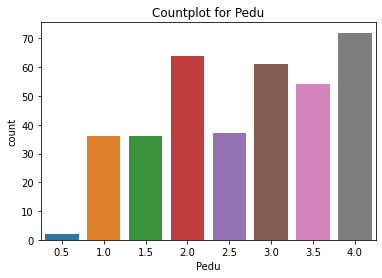

In [127]:
#Focusing on one variable: Paternal Education (Pedu)

sns.countplot(data = df_cleaned, x = 'Pedu').set(title= "Countplot for Pedu")

<AxesSubplot:ylabel='Frequency'>

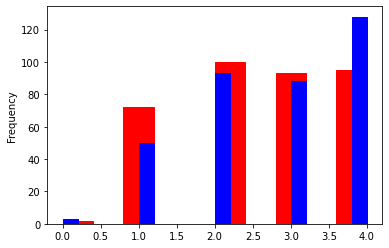

In [142]:
#Comparing two variables: Medu and Fedu

df_cleaned['Fedu'].plot(kind='hist', bins=10, facecolor='red',edgecolor='red')
df_cleaned['Medu'].plot(kind='hist', bins=20, facecolor='blue',edgecolor='blue')

(<AxesSubplot:title={'center':'Comparing Fedu to Medu via Histogram'}, xlabel='Education Level', ylabel='Frequency'>,
 [Text(0.5, 1.0, 'Comparing Fedu to Medu via Histogram'),
  Text(0.5, 0, 'Education Level')])

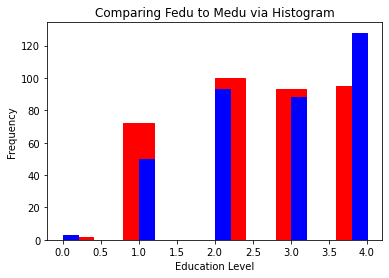

In [146]:
histo1 = df_cleaned['Fedu'].plot(kind='hist', bins=10, facecolor='red',edgecolor='red')
histo2 = df_cleaned['Medu'].plot(kind='hist', bins=20, facecolor='blue',edgecolor='blue')
histo1, histo2.set(title = "Comparing Fedu to Medu via Histogram", xlabel = "Education Level")


[Text(0.5, 1.0, 'Number of Students at Each Age')]

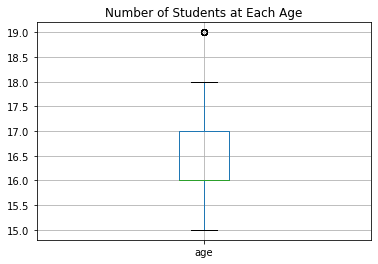

In [129]:
#Focusing on one variable: Age of students (age)
AgeBox = df_cleaned.boxplot('age').set(title='Number of Students at Each Age')
AgeBox

[Text(0.5, 1.0, 'Number of Students at Each Age'),
 Text(0, 0.5, 'Age'),
 Text(0.5, 0, 'Number of Students')]

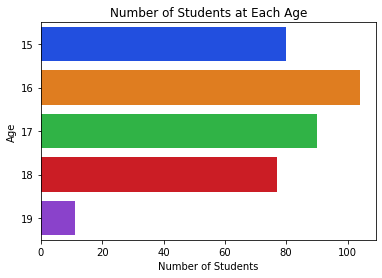

In [92]:
AgeCount = sns.countplot(data=df_cleaned, y="age", palette = "bright").set(title='Number of Students at Each Age', ylabel = "Age", xlabel = "Number of Students")
AgeCount

In [ ]:
#Task2